In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import sys

PATH_CODED_SCV = '../data/coded.csv'
PATH_FLYING_ETIQUETTE_CSV ='../data/flying-etiquette.csv'

df = pd.read_csv(PATH_CODED_SCV)
def calculate_conditional_probability_for_category(df, condition_column, condition_value, event_column, event_value):
    """
    Calculate conditional probability for a specific category in the condition column given the event column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - condition_column (str): The column for which conditional probability is calculated.
    - condition_value: The specific category in the condition column.
    - event_column (str): The column representing the event.
    - event_value: The specific category in the event column.
    """
    condition_occurrences = df[df[condition_column] == condition_value].shape[0]
    event_and_condition_occurrences = df[(df[condition_column] == condition_value) & (df[event_column] == event_value)].shape[0]

    if condition_occurrences == 0:
        return 0  # To avoid division by zero

    conditional_probability = event_and_condition_occurrences / condition_occurrences
    return conditional_probability



def calculate_conditional_probability(df, condition_column, event_column):
    # Group by the condition column and calculate the conditional probabilities
    probabilities = df.groupby(condition_column)[event_column].value_counts(normalize=True).unstack()

    # Fill NaN values with 0 (when the condition is not present for a specific event)
    probabilities = probabilities.fillna(0)

    return probabilities



def cramers_v(df, x, y):
    confusion_matrix = pd.crosstab(df[x], df[y])

    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


cramers_v_education_obligation = cramers_v(df, "Education", "Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?")
print(cramers_v_education_obligation)


0.04496528326559228


Education                                                0.0       1.0  \
Under normal circumstances, does a person who r...                       
0.0                                                 0.000000  0.059603   
1.0                                                 0.011215  0.080374   

Education                                                2.0       3.0  \
Under normal circumstances, does a person who r...                       
0.0                                                 0.278146  0.357616   
1.0                                                 0.265421  0.319626   

Education                                                4.0  
Under normal circumstances, does a person who r...            
0.0                                                 0.304636  
1.0                                                 0.323364  


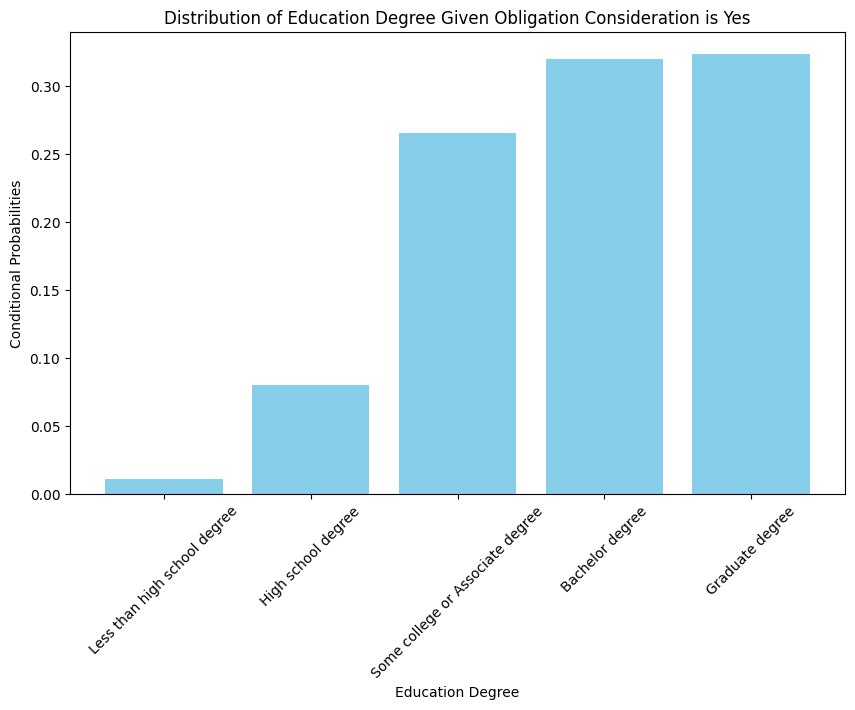

In [21]:
# Data for the plot
education_levels = ['Less than high school degree', 'High school degree', 'Some college or Associate degree', 
                    'Bachelor degree', 'Graduate degree']

education_obligation = calculate_conditional_probability(df, "Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?", "Education")
print(education_obligation)


# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(education_levels, education_obligation.loc[1.0], color='skyblue')

# Adding title and labels
plt.title("Distribution of Education Degree Given Obligation Consideration is Yes")
plt.xlabel("Education Degree")
plt.ylabel("Conditional Probabilities")

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [22]:
from features_trans_back import features_trans_back_shortened as ftbs
education_obligation.reset_index().columns[0]

'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?'

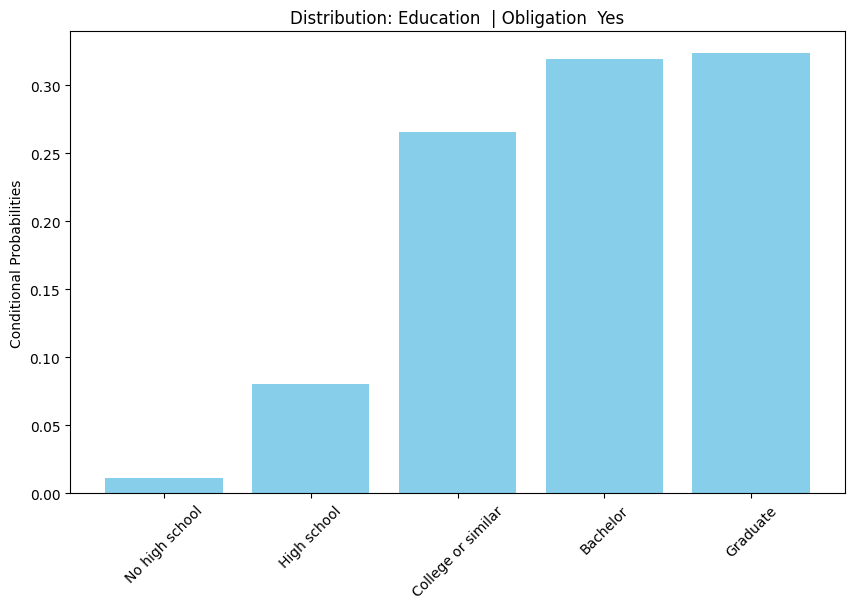

In [23]:
from features_trans_back import features_trans_back_shortened as ftbs
from features_trans_back import question_short as qs


def plot_conditional_probs(df, condition, ftbs, qs):
    # Data for the plot
    categories = ftbs(df.keys().name)
    categories_labels = list(categories.values())

    event_qs = df.keys().name

    condition_qs = df.reset_index().columns[0]

    # Creating the plot
    plt.figure(figsize=(10, 6))
    plt.bar(categories_labels, df.loc[condition], color='skyblue')

    # Adding title and labels
    plt.title(f"Distribution: {qs(event_qs)}  | {qs(condition_qs)}  {ftbs(condition_qs, condition)}" )
    # plt.xlabel("Education Degree")
    plt.ylabel("Conditional Probabilities")

    # Rotating the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    # plt.show()

plot_conditional_probs(education_obligation, 1.0, ftbs, qs)


In [24]:
print(df["On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?"].unique())
df_2 = pd.read_csv(PATH_FLYING_ETIQUETTE_CSV)
print(df_2["On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?"].unique())


[nan  3.  2.  4.  1.  5.  0.]
[nan 'Twice' 'Three times' 'Once' 'Four times'
 'It is not okay to get up during flight' 'More than five times times']


#### Plots for Travel Frequency 

calculate_conditional_probability(df, condition_column, event_column):
plot_conditional_probs(df, condition, ftbs, qs)





Do you ever recline your seat when you fly?       0.0       1.0       2.0  \
How often do you travel by plane?                                           
1                                            0.170692  0.207729  0.125604   
2                                            0.108374  0.201970  0.182266   
3                                            0.241379  0.137931  0.103448   
4                                            0.500000  0.000000  0.000000   
5                                            0.333333  0.333333  0.000000   

Do you ever recline your seat when you fly?       3.0       4.0  
How often do you travel by plane?                                
1                                            0.289855  0.206119  
2                                            0.339901  0.167488  
3                                            0.241379  0.275862  
4                                            0.000000  0.500000  
5                                            0.333333  0.000000 

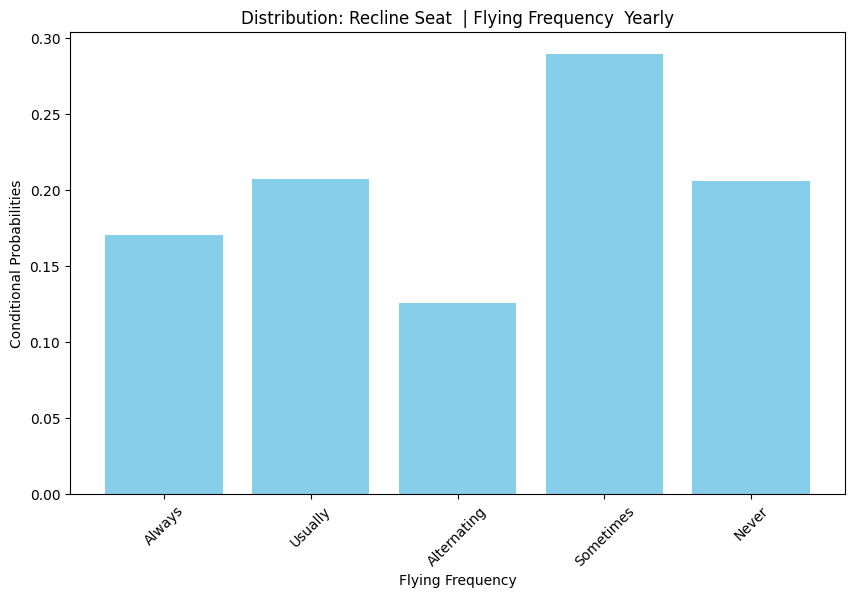

Do you have any children under 18?       0.0       1.0
How often do you travel by plane?                     
1                                   0.776699  0.223301
2                                   0.800000  0.200000
3                                   0.724138  0.275862
4                                   0.500000  0.500000
5                                   0.000000  1.000000


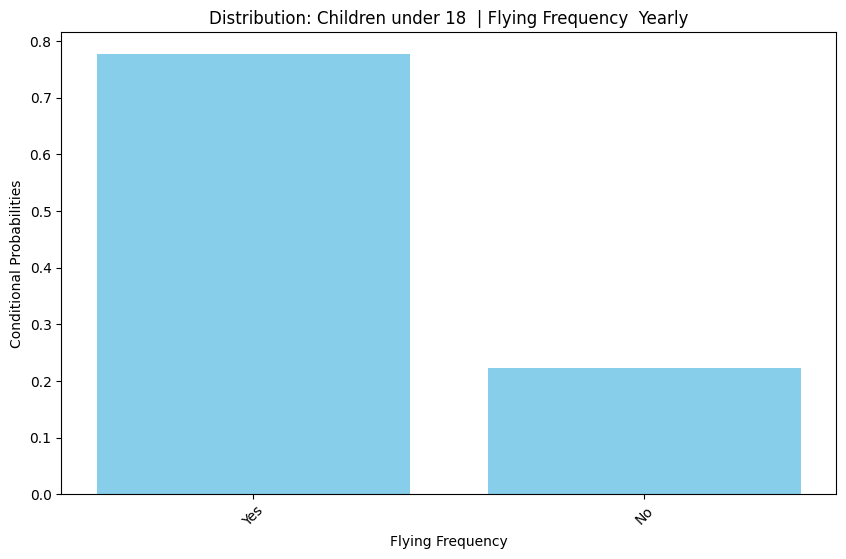

In a row of three seats, who should get to use the two arm rests?       1.0  \
How often do you travel by plane?                                             
1                                                                  0.016129   
2                                                                  0.034653   
3                                                                  0.000000   
4                                                                  0.000000   
5                                                                  0.333333   

In a row of three seats, who should get to use the two arm rests?       2.0  \
How often do you travel by plane?                                             
1                                                                  0.108065   
2                                                                  0.079208   
3                                                                  0.103448   
4                                                  

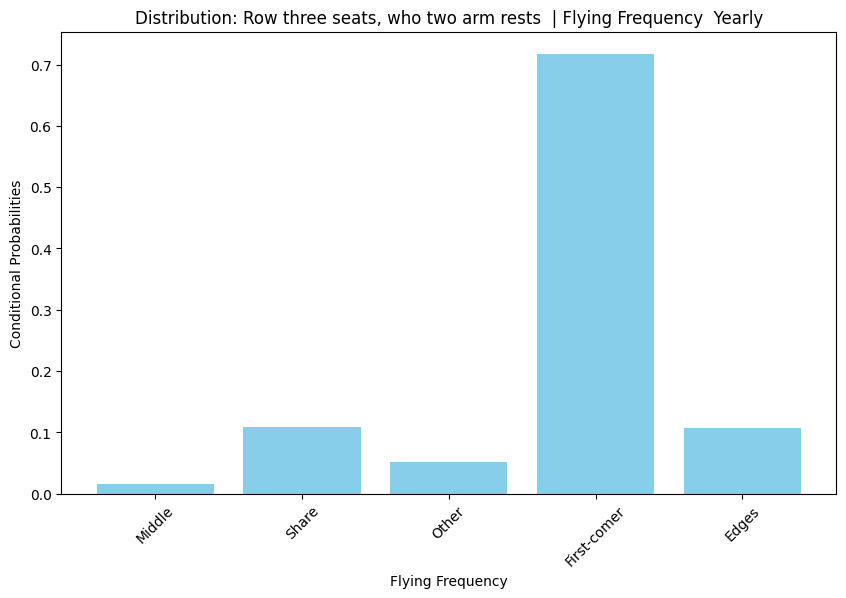

In a row of two seats, who should get to use the middle arm rest?       1.0  \
How often do you travel by plane?                                             
1                                                                  0.048387   
2                                                                  0.044554   
3                                                                  0.068966   
4                                                                  0.000000   
5                                                                  0.000000   

In a row of two seats, who should get to use the middle arm rest?       2.0  \
How often do you travel by plane?                                             
1                                                                  0.158065   
2                                                                  0.148515   
3                                                                  0.137931   
4                                                  

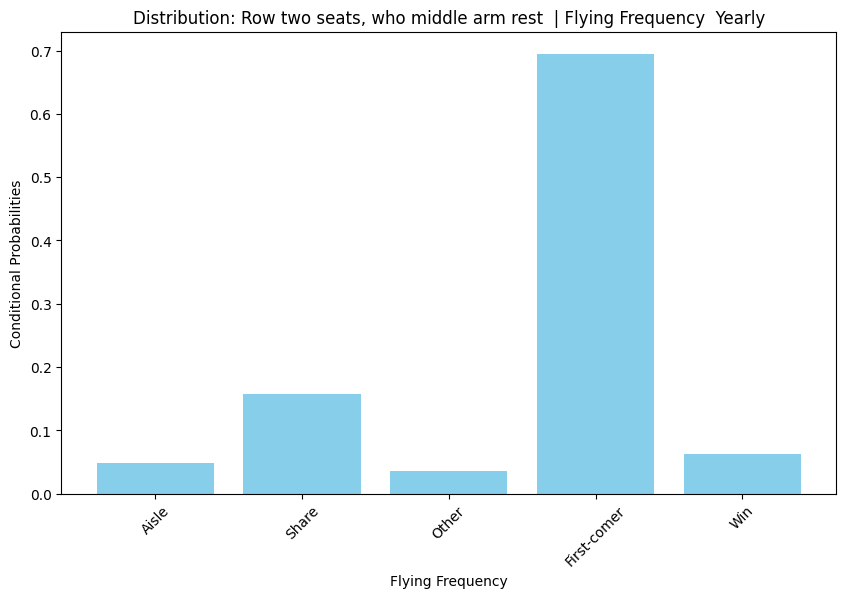

Who should have control over the window shade?       0.0       1.0
How often do you travel by plane?                                 
1                                               0.416129  0.583871
2                                               0.425743  0.574257
3                                               0.482759  0.517241
4                                               0.500000  0.500000
5                                               0.666667  0.333333


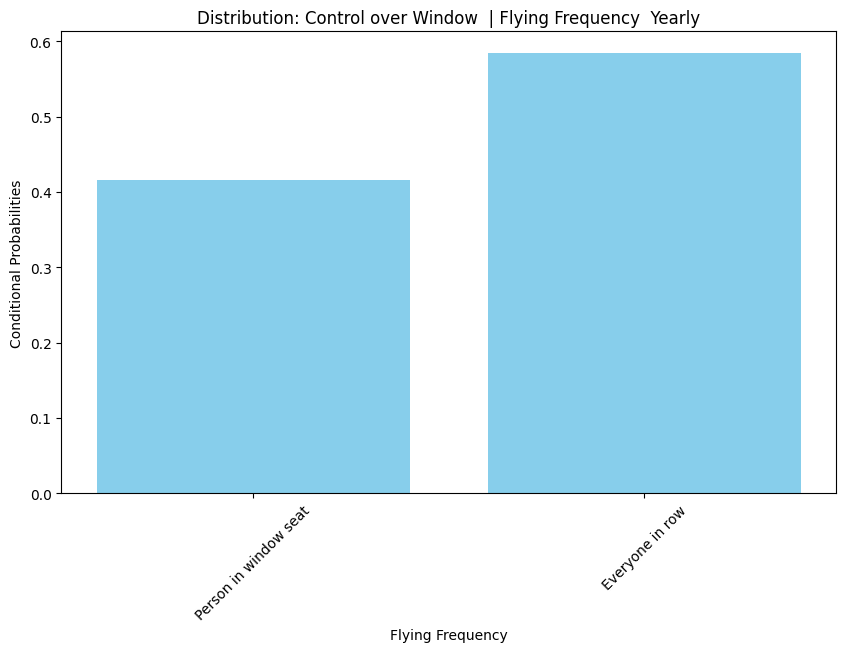

Is itrude to move to an unsold seat on a plane?       0.0       1.0       2.0
How often do you travel by plane?                                            
1                                                0.802908  0.158320  0.038772
2                                                0.836634  0.118812  0.044554
3                                                0.793103  0.137931  0.068966
4                                                0.500000  0.000000  0.500000
5                                                0.000000  0.666667  0.333333


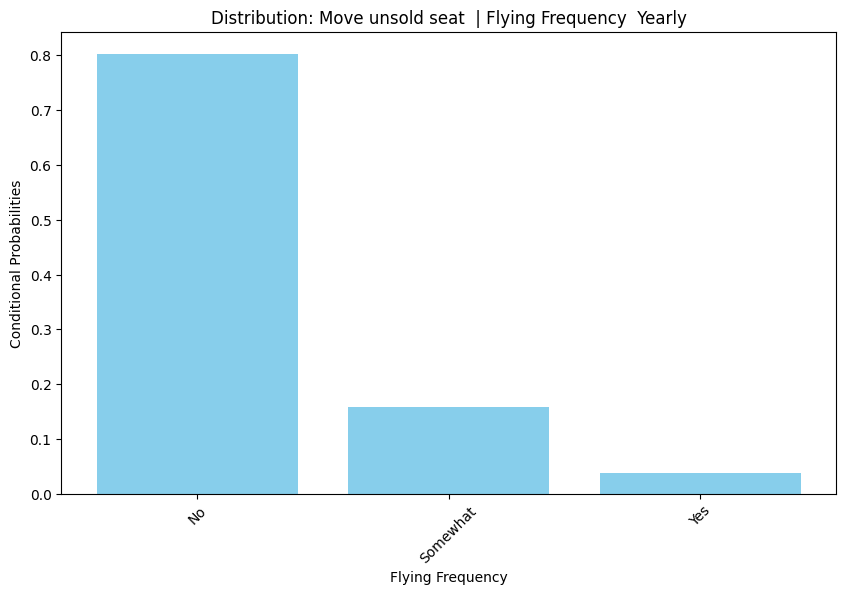

Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?       0.0  \
How often do you travel by plane?                                                                                      
1                                                                                                           0.793215   
2                                                                                                           0.816832   
3                                                                                                           0.620690   
4                                                                                                           0.500000   
5                                                                                                           0.000000   

Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?       1.0  \
How often do you travel by plane?      

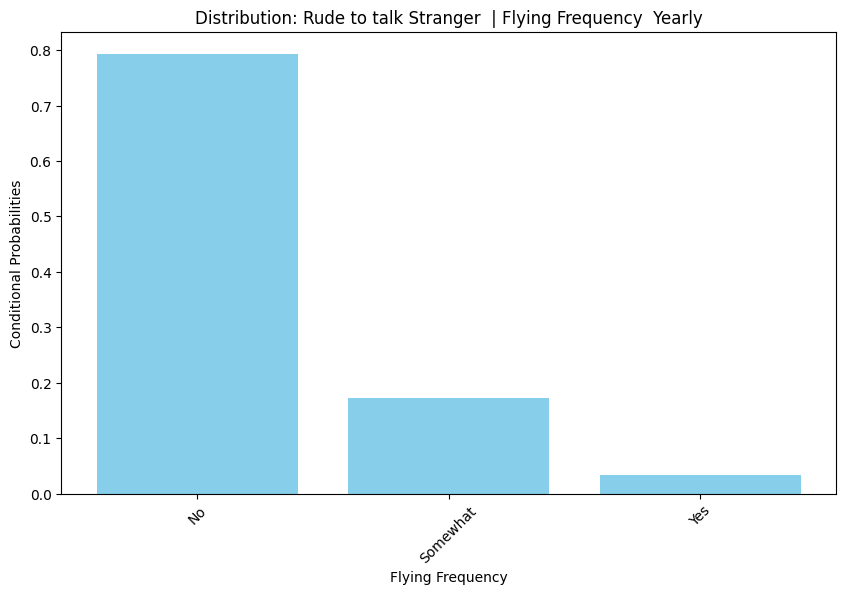

On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?       0.0  \
How often do you travel by plane?                                                                                        
1                                                                                                             0.109855   
2                                                                                                             0.079208   
3                                                                                                             0.206897   
4                                                                                                             0.500000   
5                                                                                                             0.000000   

On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?       1.0  \
How often do you travel

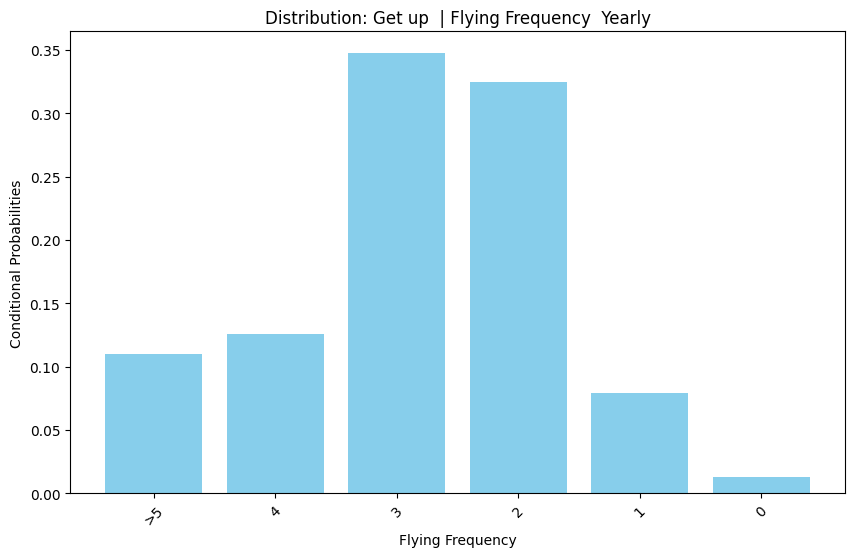

Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?       0.0  \
How often do you travel by plane?                                                                                                                    
1                                                                                                                                         0.344660   
2                                                                                                                                         0.415842   
3                                                                                                                                         0.413793   
4                                                                                                                                         0.500000   
5                                                                                                   

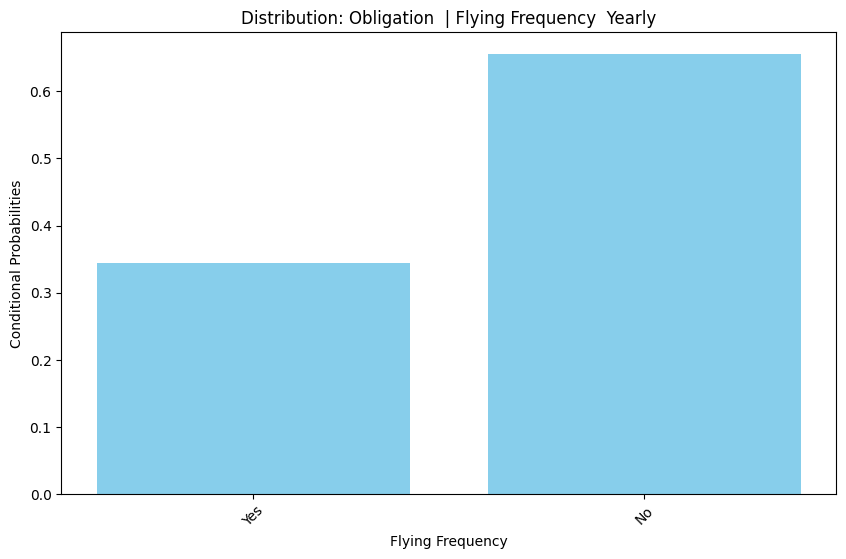

Is itrude to recline your seat on a plane?       0.0       1.0       2.0
How often do you travel by plane?                                       
1                                           0.613269  0.309061  0.077670
2                                           0.529703  0.405941  0.064356
3                                           0.517241  0.241379  0.241379
4                                           0.500000  0.500000  0.000000
5                                           0.000000  0.000000  1.000000


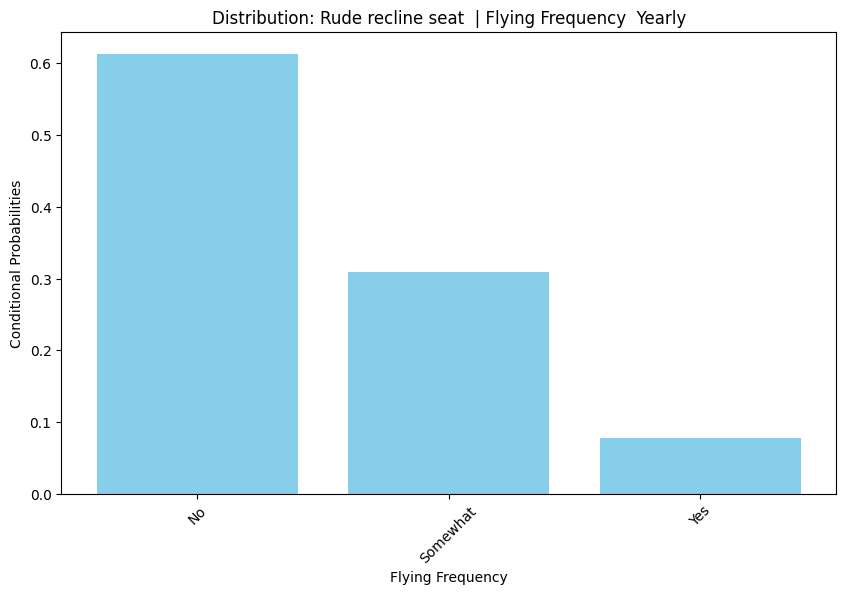

Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?       0.0  \
How often do you travel by plane?                                                                             
1                                                                                                  0.707120   
2                                                                                                  0.693069   
3                                                                                                  0.586207   
4                                                                                                  0.500000   
5                                                                                                  0.000000   

Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?       1.0  
How often do you travel by plane?                                                                            
1 

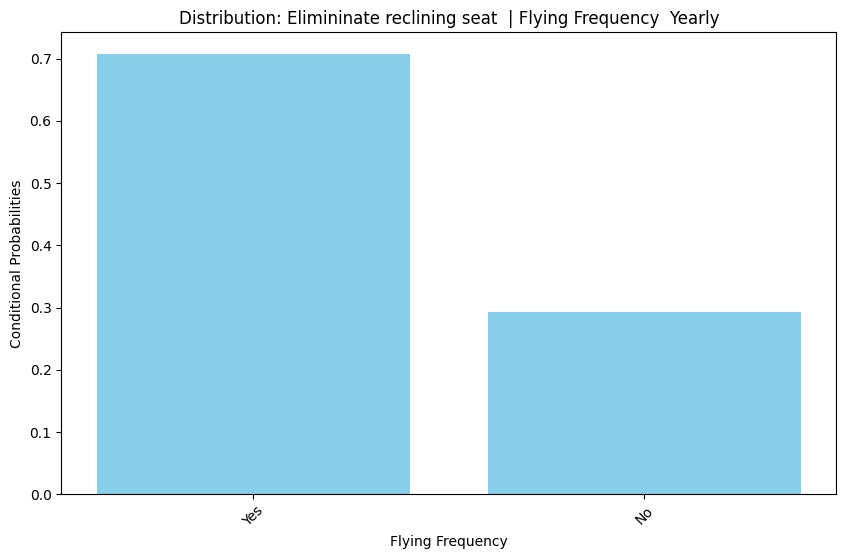

Is it rude to ask someone to switch seats with you in order to be closer to friends?       0.0  \
How often do you travel by plane?                                                                
1                                                                                     0.731270   
2                                                                                     0.772277   
3                                                                                     0.862069   
4                                                                                     0.500000   
5                                                                                     0.000000   

Is it rude to ask someone to switch seats with you in order to be closer to friends?       1.0  \
How often do you travel by plane?                                                                
1                                                                                     0.224756   
2                  

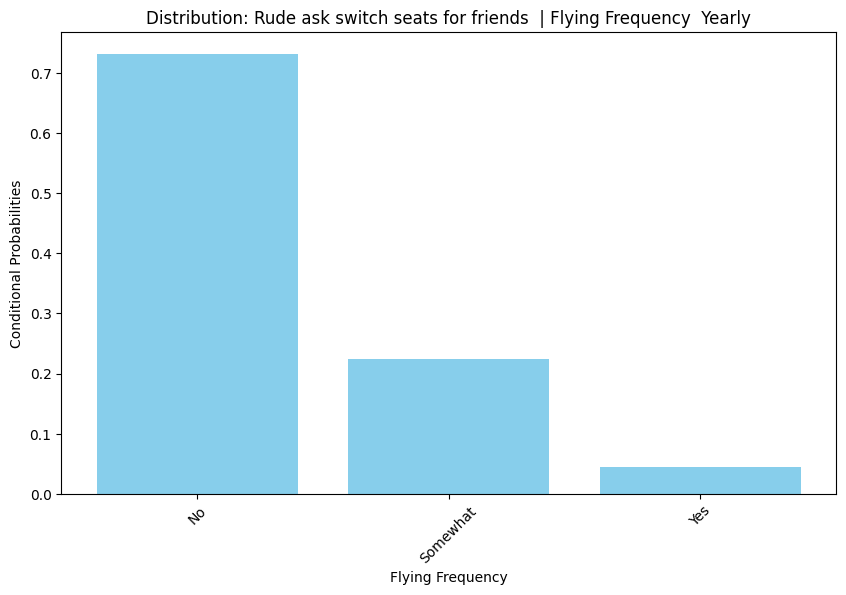

Is itrude to ask someone to switch seats with you in order to be closer to family?       0.0  \
How often do you travel by plane?                                                              
1                                                                                   0.822476   
2                                                                                   0.856436   
3                                                                                   0.896552   
4                                                                                   0.500000   
5                                                                                   0.000000   

Is itrude to ask someone to switch seats with you in order to be closer to family?       1.0  \
How often do you travel by plane?                                                              
1                                                                                   0.156352   
2                                      

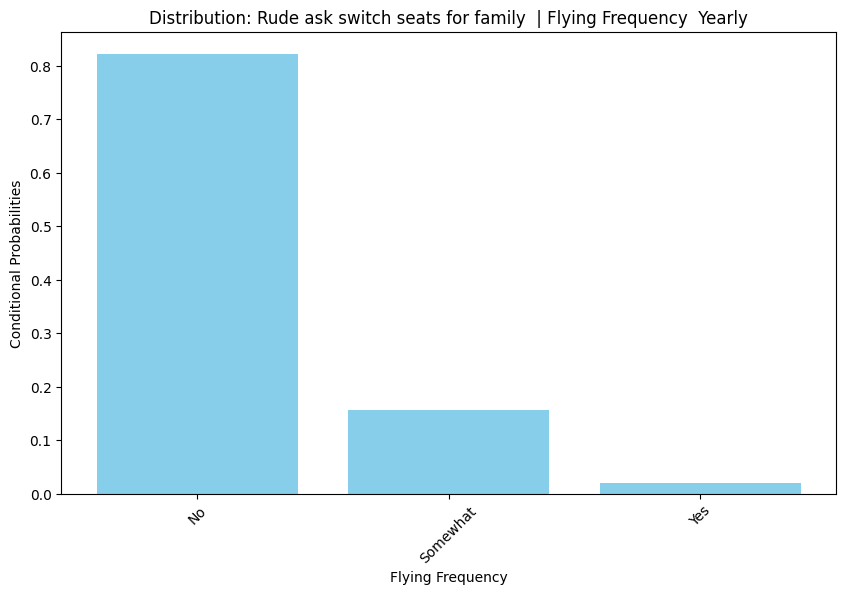

Is it rude to wake a passenger up if you are trying to go to the bathroom?       0.0  \
How often do you travel by plane?                                                      
1                                                                           0.631922   
2                                                                           0.608911   
3                                                                           0.793103   
4                                                                           0.500000   
5                                                                           0.000000   

Is it rude to wake a passenger up if you are trying to go to the bathroom?       1.0  \
How often do you travel by plane?                                                      
1                                                                           0.325733   
2                                                                           0.361386   
3                              

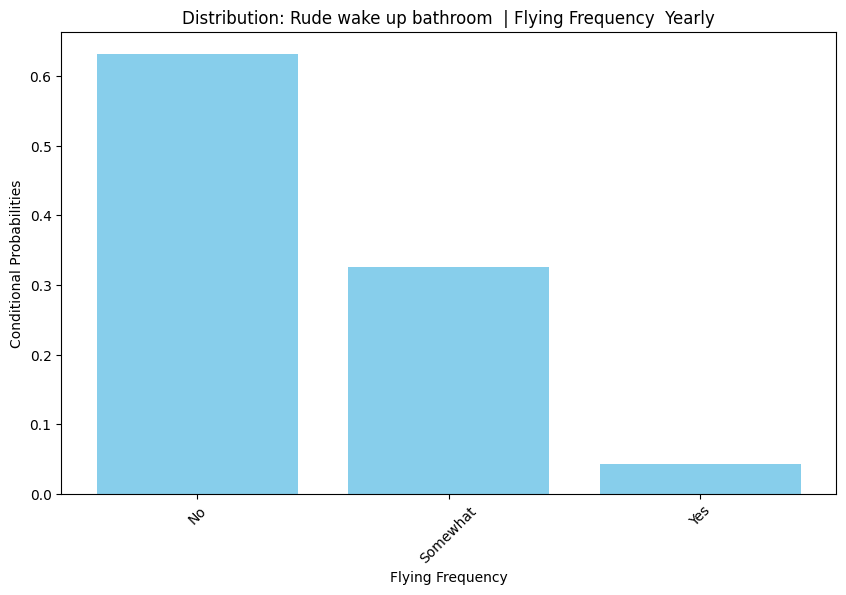

Is itrude to wake a passenger up if you are trying to walk around?       0.0  \
How often do you travel by plane?                                              
1                                                                   0.250814   
2                                                                   0.297030   
3                                                                   0.344828   
4                                                                   0.500000   
5                                                                   0.333333   

Is itrude to wake a passenger up if you are trying to walk around?       1.0  \
How often do you travel by plane?                                              
1                                                                   0.534202   
2                                                                   0.504950   
3                                                                   0.482759   
4                                      

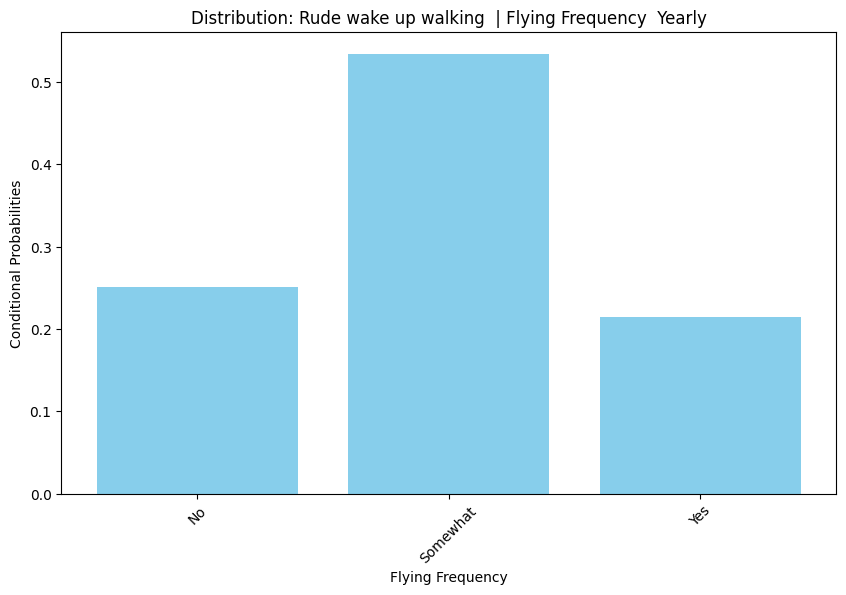

In general, is itrude to bring a baby on a plane?       0.0       1.0  \
How often do you travel by plane?                                       
1                                                  0.705212  0.210098   
2                                                  0.696517  0.238806   
3                                                  0.620690  0.103448   
4                                                  0.500000  0.500000   
5                                                  0.000000  0.333333   

In general, is itrude to bring a baby on a plane?       2.0  
How often do you travel by plane?                            
1                                                  0.084691  
2                                                  0.064677  
3                                                  0.275862  
4                                                  0.000000  
5                                                  0.666667  


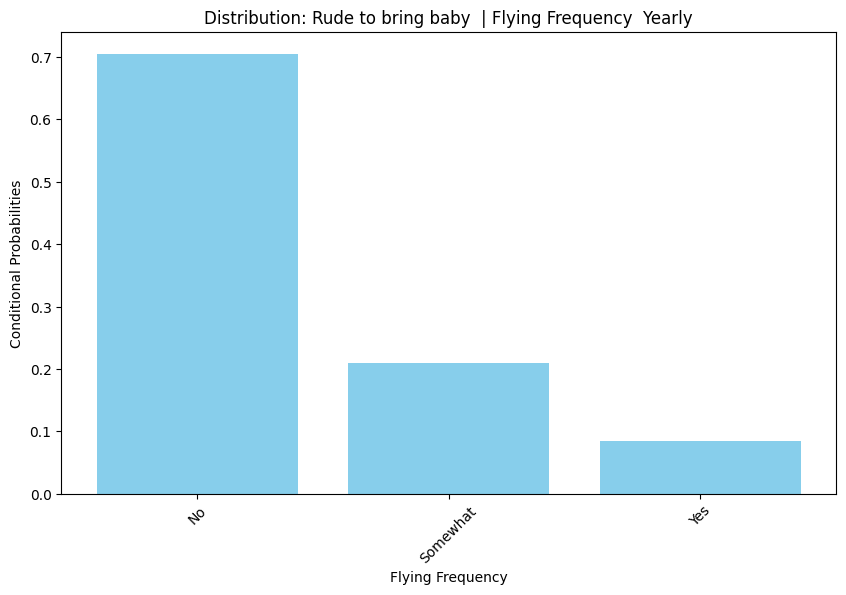

In general, is it rude to knowingly bring unruly children on a plane?       0.0  \
How often do you travel by plane?                                                 
1                                                                      0.175896   
2                                                                      0.159204   
3                                                                      0.206897   
4                                                                      0.500000   
5                                                                      0.000000   

In general, is it rude to knowingly bring unruly children on a plane?       1.0  \
How often do you travel by plane?                                                 
1                                                                      0.413681   
2                                                                      0.427861   
3                                                                      0.310345   
4  

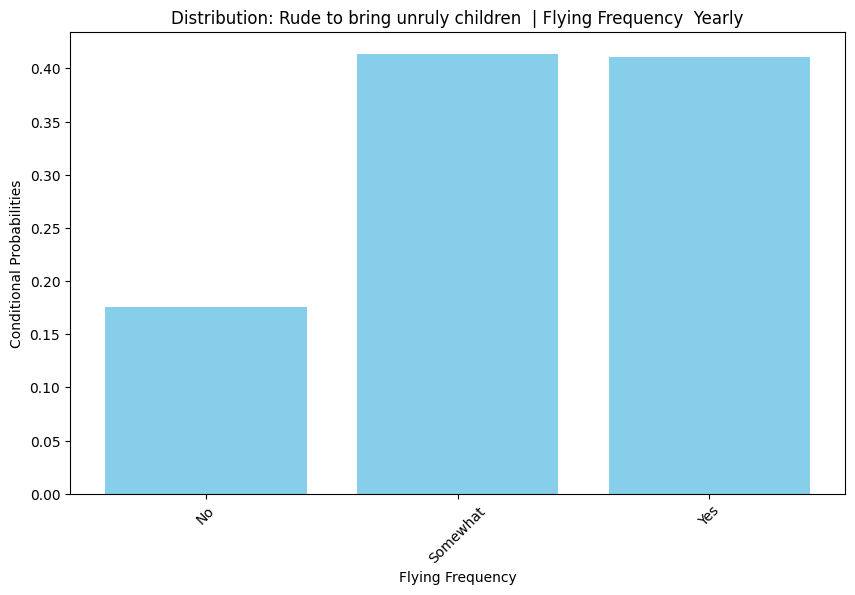

Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?       0.0  \
How often do you travel by plane?                                                                                              
1                                                                                                                   0.881107   
2                                                                                                                   0.751244   
3                                                                                                                   0.689655   
4                                                                                                                   0.000000   
5                                                                                                                   0.333333   

Have you ever used personal electronics during take off or landing in violation of a flight attendant's

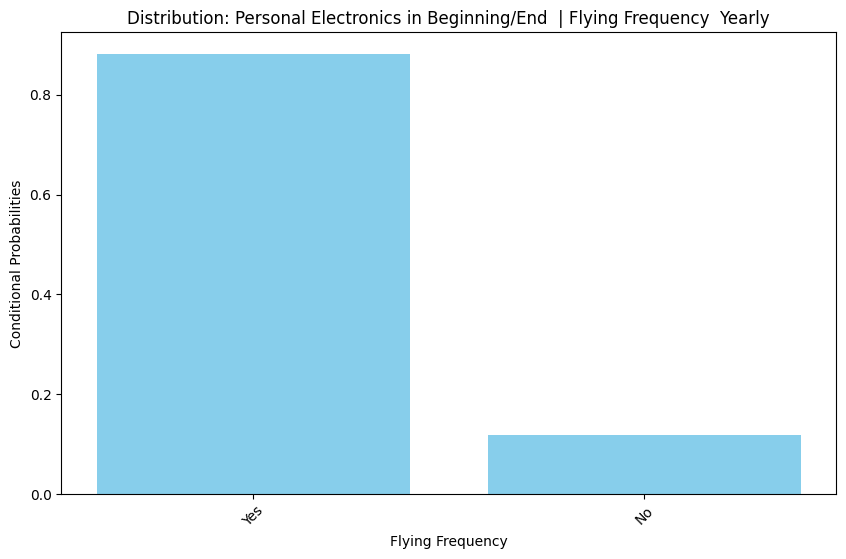

Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?       0.0  \
How often do you travel by plane?                                                                   
1                                                                                        0.995114   
2                                                                                        0.995025   
3                                                                                        1.000000   
4                                                                                        0.000000   
5                                                                                        0.666667   

Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?       1.0  
How often do you travel by plane?                                                                  
1                                                                                        0.0

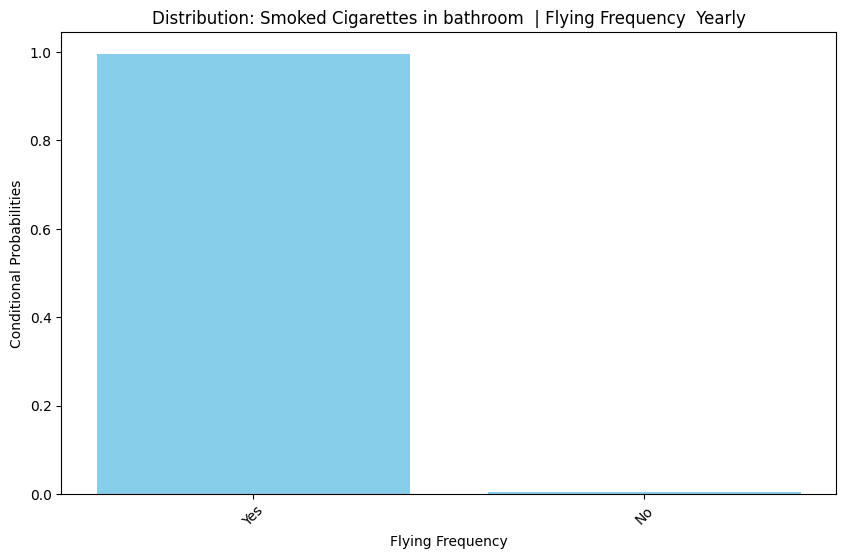

Gender                                  0.0       1.0
How often do you travel by plane?                    
0                                  0.475610  0.524390
1                                  0.453355  0.546645
2                                  0.510101  0.489899
3                                  0.655172  0.344828
4                                  1.000000  0.000000
5                                  0.666667  0.333333


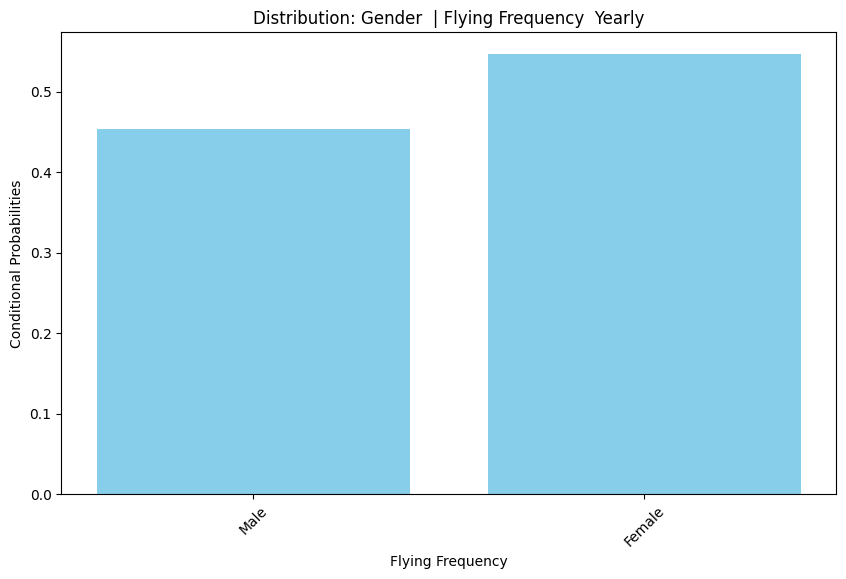

Age                                     0.0       1.0       2.0       3.0
How often do you travel by plane?                                        
0                                  0.292683  0.195122  0.250000  0.262195
1                                  0.193126  0.270049  0.268412  0.268412
2                                  0.232323  0.247475  0.277778  0.242424
3                                  0.206897  0.206897  0.482759  0.103448
4                                  0.000000  0.500000  0.500000  0.000000
5                                  0.666667  0.333333  0.000000  0.000000


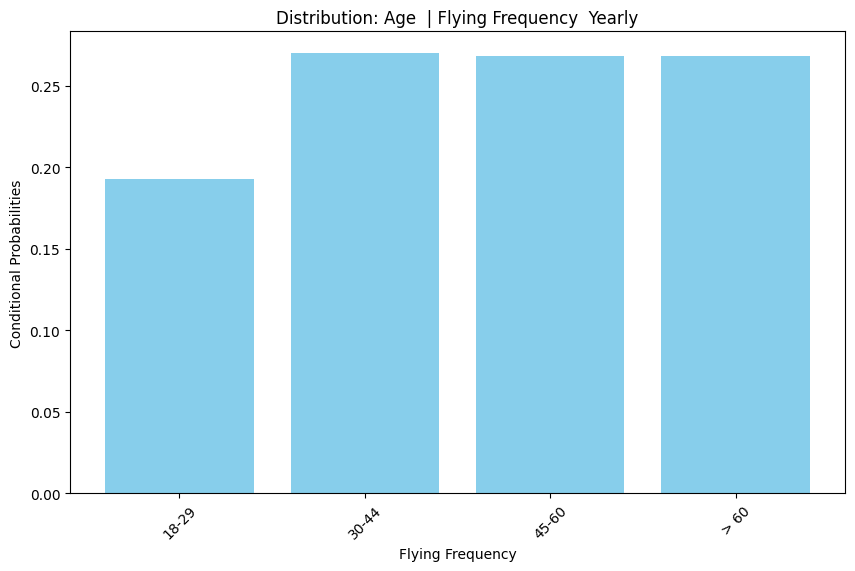

Household Income                        0.0       1.0       2.0       3.0  \
How often do you travel by plane?                                           
0                                  0.289062  0.265625  0.281250  0.093750   
1                                  0.108696  0.207510  0.377470  0.203557   
2                                  0.030864  0.111111  0.382716  0.222222   
3                                  0.038462  0.038462  0.153846  0.307692   
4                                  0.000000  0.000000  0.500000  0.000000   
5                                  0.500000  0.500000  0.000000  0.000000   

Household Income                        4.0  
How often do you travel by plane?            
0                                  0.070312  
1                                  0.102767  
2                                  0.253086  
3                                  0.461538  
4                                  0.500000  
5                                  0.000000  


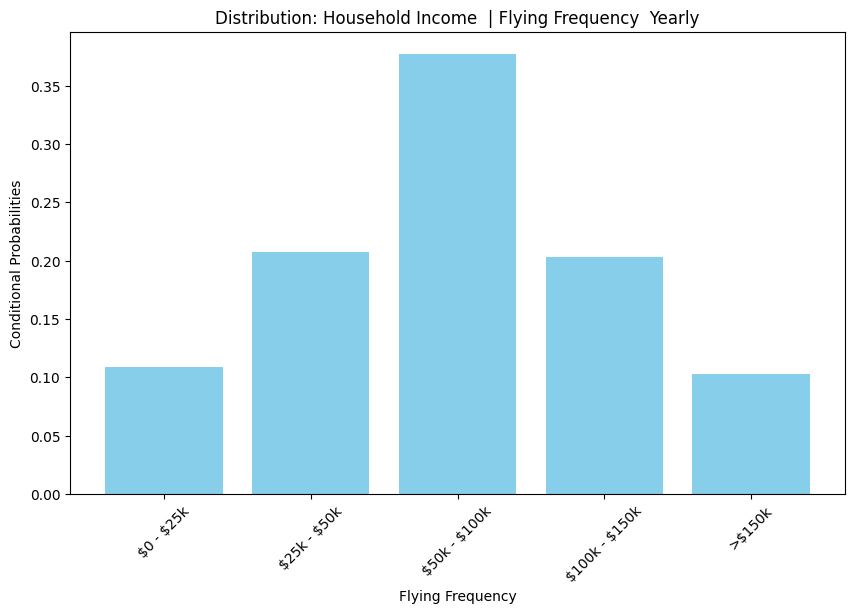

Education                               0.0       1.0       2.0       3.0  \
How often do you travel by plane?                                           
0                                  0.012195  0.225610  0.365854  0.280488   
1                                  0.006568  0.087028  0.300493  0.321839   
2                                  0.005128  0.035897  0.174359  0.374359   
3                                  0.000000  0.000000  0.275862  0.310345   
4                                  0.000000  0.500000  0.000000  0.500000   
5                                  0.500000  0.000000  0.500000  0.000000   

Education                               4.0  
How often do you travel by plane?            
0                                  0.115854  
1                                  0.284072  
2                                  0.410256  
3                                  0.413793  
4                                  0.000000  
5                                  0.000000  


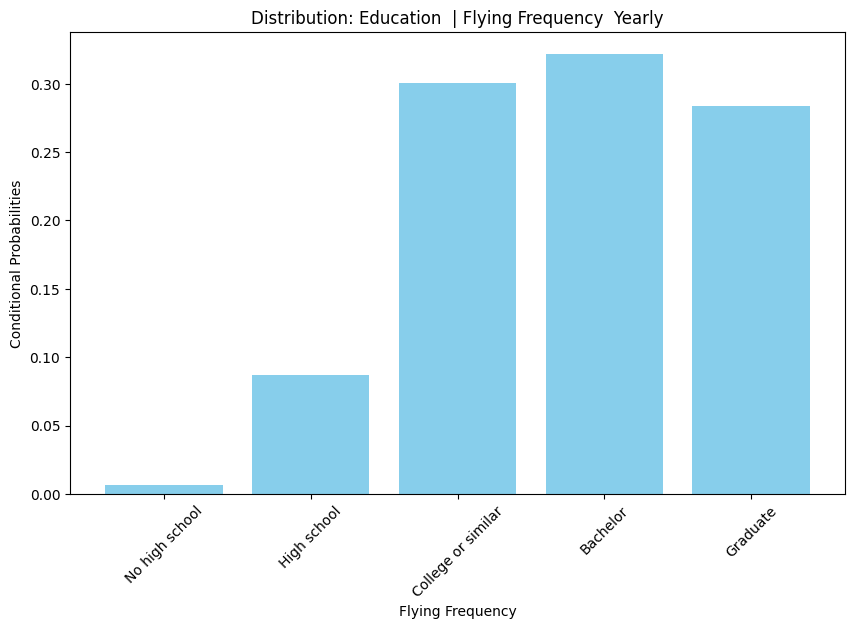

Location (Census Region)                0.0       1.0       2.0       3.0  \
How often do you travel by plane?                                           
0                                  0.204969  0.161491  0.062112  0.055901   
1                                  0.202970  0.148515  0.072607  0.067657   
2                                  0.269036  0.147208  0.040609  0.060914   
3                                  0.241379  0.103448  0.068966  0.034483   
4                                  0.000000  0.000000  0.500000  0.000000   
5                                  0.666667  0.000000  0.000000  0.000000   

Location (Census Region)                4.0       5.0       6.0       7.0  \
How often do you travel by plane?                                           
0                                  0.161491  0.055901  0.161491  0.055901   
1                                  0.165017  0.031353  0.145215  0.082508   
2                                  0.147208  0.025381  0.101523  0.076142  

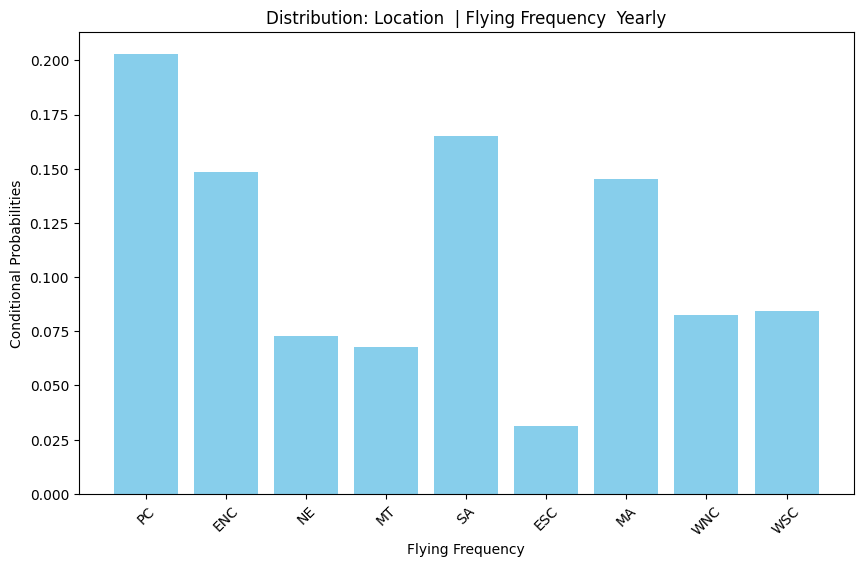

In [25]:

def many_plots (df, feature, calculate_conditional_probability, plot_conditional_probs, ftbs, qs):
    questions = list(df.columns)[1:]
    for q in questions:
        if q == feature:
            continue
        if q == 'How tall are you?':
            continue
        conditional_prob = calculate_conditional_probability(df, feature, q)
        print(conditional_prob)
        plot_conditional_probs(conditional_prob, 1.0, ftbs, qs)
        plt.xlabel("Flying Frequency")
        plt.show()
many_plots(df, 'How often do you travel by plane?', calculate_conditional_probability, plot_conditional_probs, ftbs, qs)


